In [1]:
import netCDF4 as nc
from netCDF4 import Dataset
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import xarray as xr
import numpy as np
import pandas as pd
import seaborn as sns
import seaborn_image as isns
import calendar

In [2]:
plt.style.use('seaborn-pastel')
isns.set_context(mode="notebook", fontfamily="Helvetica")
sns.set_context(font_scale=0.8)

In [3]:
data_baseline = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/alk_Baseline_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

/opt/anaconda3/envs/GEOMAR/lib/python3.7/site-packages/pyproj/__init__.py:89: UserWarning: pyproj unable to set database path.
  _pyproj_global_context_initialize()


In [4]:
data_oae = xr.open_dataset('/Users/chiaraciscato/Desktop/geomar/Cropped_DataTransfer/SSP1_2.6/alk_OAE_2.6_cropped.nc', decode_times=True).sel(deptht=slice(0, 150))

### EU Seasonal Average of Alkalinity

In [5]:
data_baseline = data_baseline.where(data_baseline)
data_oae = data_oae.where(data_oae)

In [6]:
sliced_frame_baseline = data_baseline.sel(time_counter=slice('2090', '2100'))

In [7]:
sliced_frame_oae = data_oae.sel(time_counter=slice('2090', '2100'))

In [8]:
data_baseline_plot = data_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
data_oae_plot = data_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [9]:
data_baseline_plot = data_baseline_plot.to_dataset()
data_oae_plot = data_oae_plot.to_dataset()

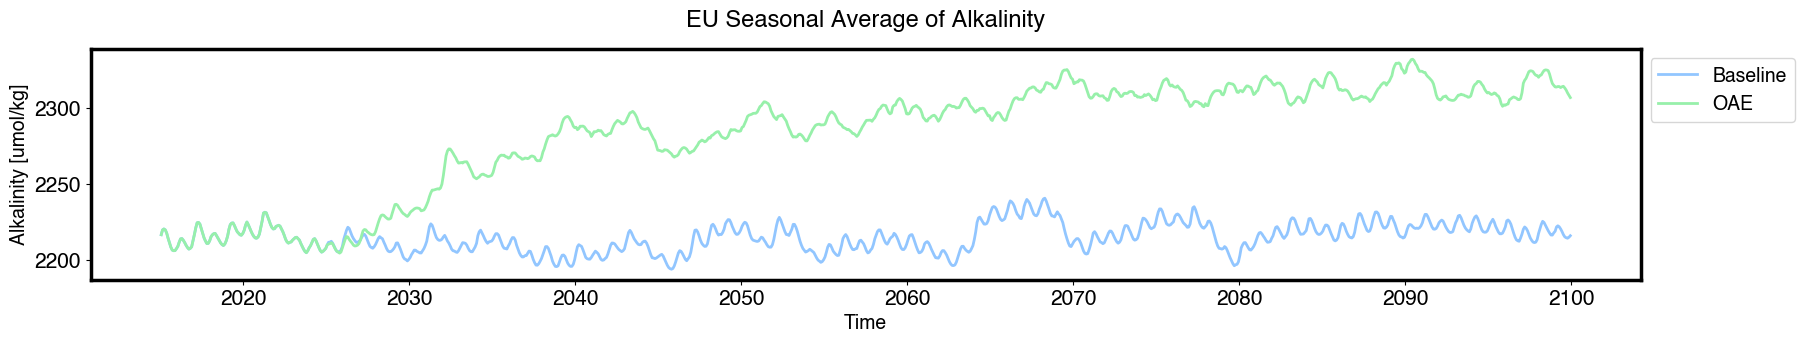

In [10]:
plt.figure(figsize=(20, 3))
plt.plot(data_baseline_plot.time_counter, data_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(data_oae_plot.time_counter, data_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

In [11]:
sliced_frame_baseline_plot = sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))
sliced_frame_oae_plot = sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))

In [12]:
sliced_frame_baseline_plot = sliced_frame_baseline_plot.to_dataset()
sliced_frame_oae_plot = sliced_frame_oae_plot.to_dataset()

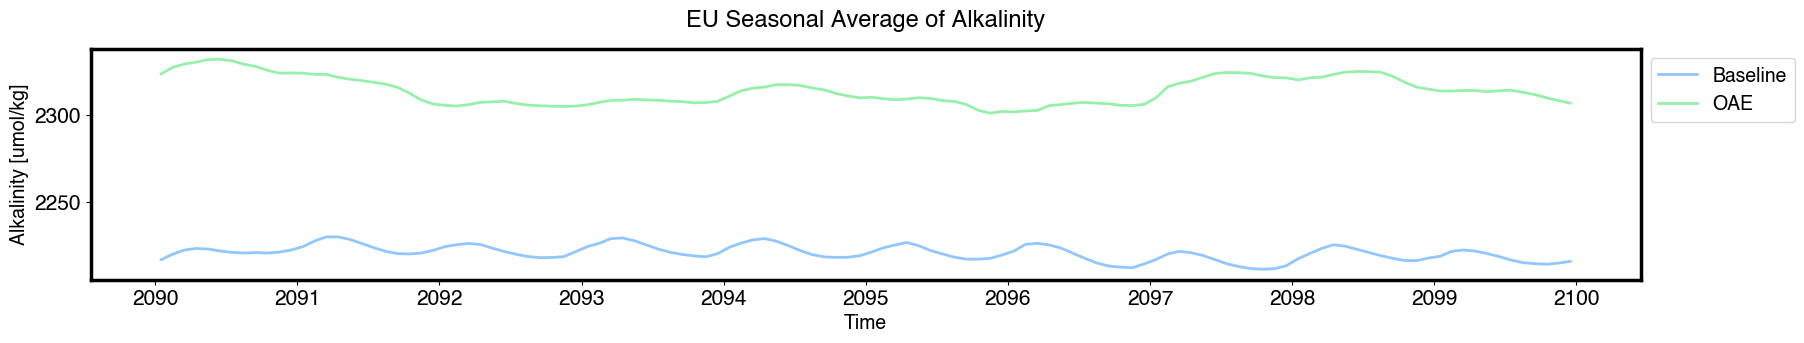

In [13]:
plt.figure(figsize=(20, 3))
plt.plot(sliced_frame_baseline_plot.time_counter, sliced_frame_baseline_plot.ALK, linewidth=2, label = 'Baseline')
plt.plot(sliced_frame_oae_plot.time_counter, sliced_frame_oae_plot.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.title('EU Seasonal Average of Alkalinity', fontsize=17, y=1.06)
plt.show()

### Unweighted EU Seasonal Average of Alkalinity

In [14]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_baseline = data_baseline["ALK"].sel(time_counter=slice(start_date, end_date))

In [15]:
alk_season_summary_baseline = alk_baseline.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_baseline = alk_baseline.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_baseline = alk_season_mean_all_years_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [16]:
start_date = "2090-01-01"
end_date = "2100-01-01"

alk_oae = data_oae["ALK"].sel(time_counter=slice(start_date, end_date))

In [17]:
alk_season_summary_oae = alk_oae.groupby('time_counter.season').mean('time_counter', skipna=True)
alk_season_mean_all_years_oae = alk_oae.resample(time_counter='QS-DEC').mean(keep_attrs=True)
alk_seasonal_mean_oae = alk_season_mean_all_years_oae.groupby('time_counter').mean(["y", "x", "deptht"])

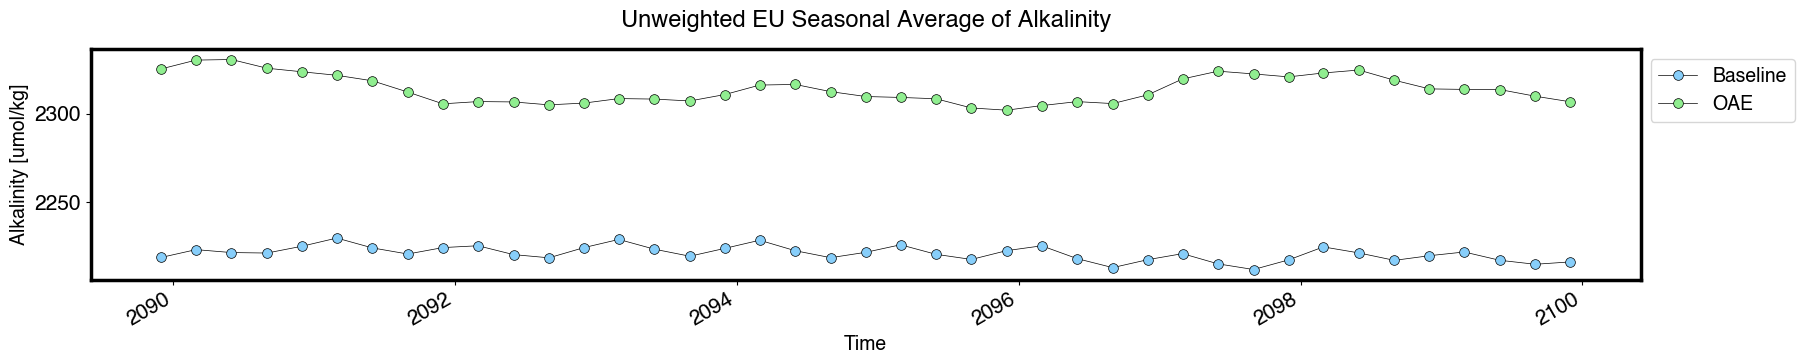

In [18]:
f, ax = plt.subplots(figsize=(20, 3))

alk_seasonal_mean_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_seasonal_mean_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Unweighted EU Seasonal Average of Alkalinity", fontsize= 17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity

In [19]:
month_length_baseline = alk_baseline.time_counter.dt.days_in_month
alk_weighted_mean_baseline = ((alk_baseline * month_length_baseline).resample(time_counter='QS-DEC').sum() / month_length_baseline.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_baseline = alk_weighted_mean_baseline.where(alk_weighted_mean_baseline)
alk_weighted_season_baseline = alk_weighted_mean_baseline.groupby('time_counter').mean(["y", "x", "deptht"])

In [20]:
month_length_oae = alk_oae.time_counter.dt.days_in_month
alk_weighted_mean_oae = ((alk_oae * month_length_oae).resample(time_counter='QS-DEC').sum() / month_length_oae.resample(time_counter='QS-DEC').sum())
alk_weighted_mean_oae = alk_weighted_mean_oae.where(alk_weighted_mean_oae)
alk_weighted_season_oae = alk_weighted_mean_oae.groupby('time_counter').mean(["y", "x", "deptht"])

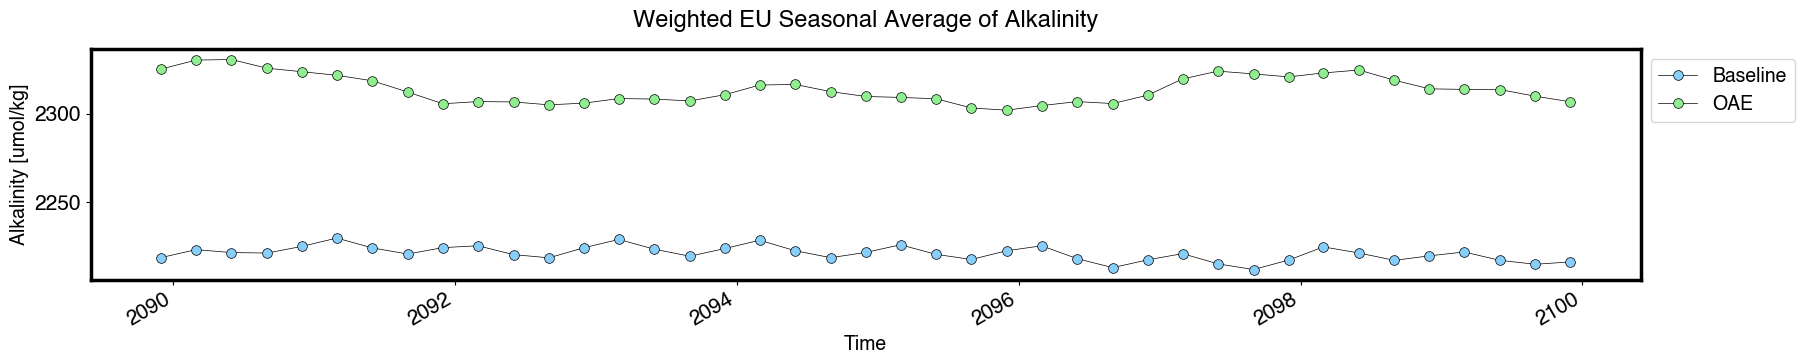

In [21]:
colors = {3: "lightgreen", 6: "orange", 9: "brown", 12: "lightblue"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, ax = plt.subplots(figsize=(20, 3))
alk_weighted_season_baseline.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightskyblue",
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_weighted_season_oae.plot(marker="o", markersize=7, markeredgewidth=0.5,
                        color="black", linewidth=0.5, 
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

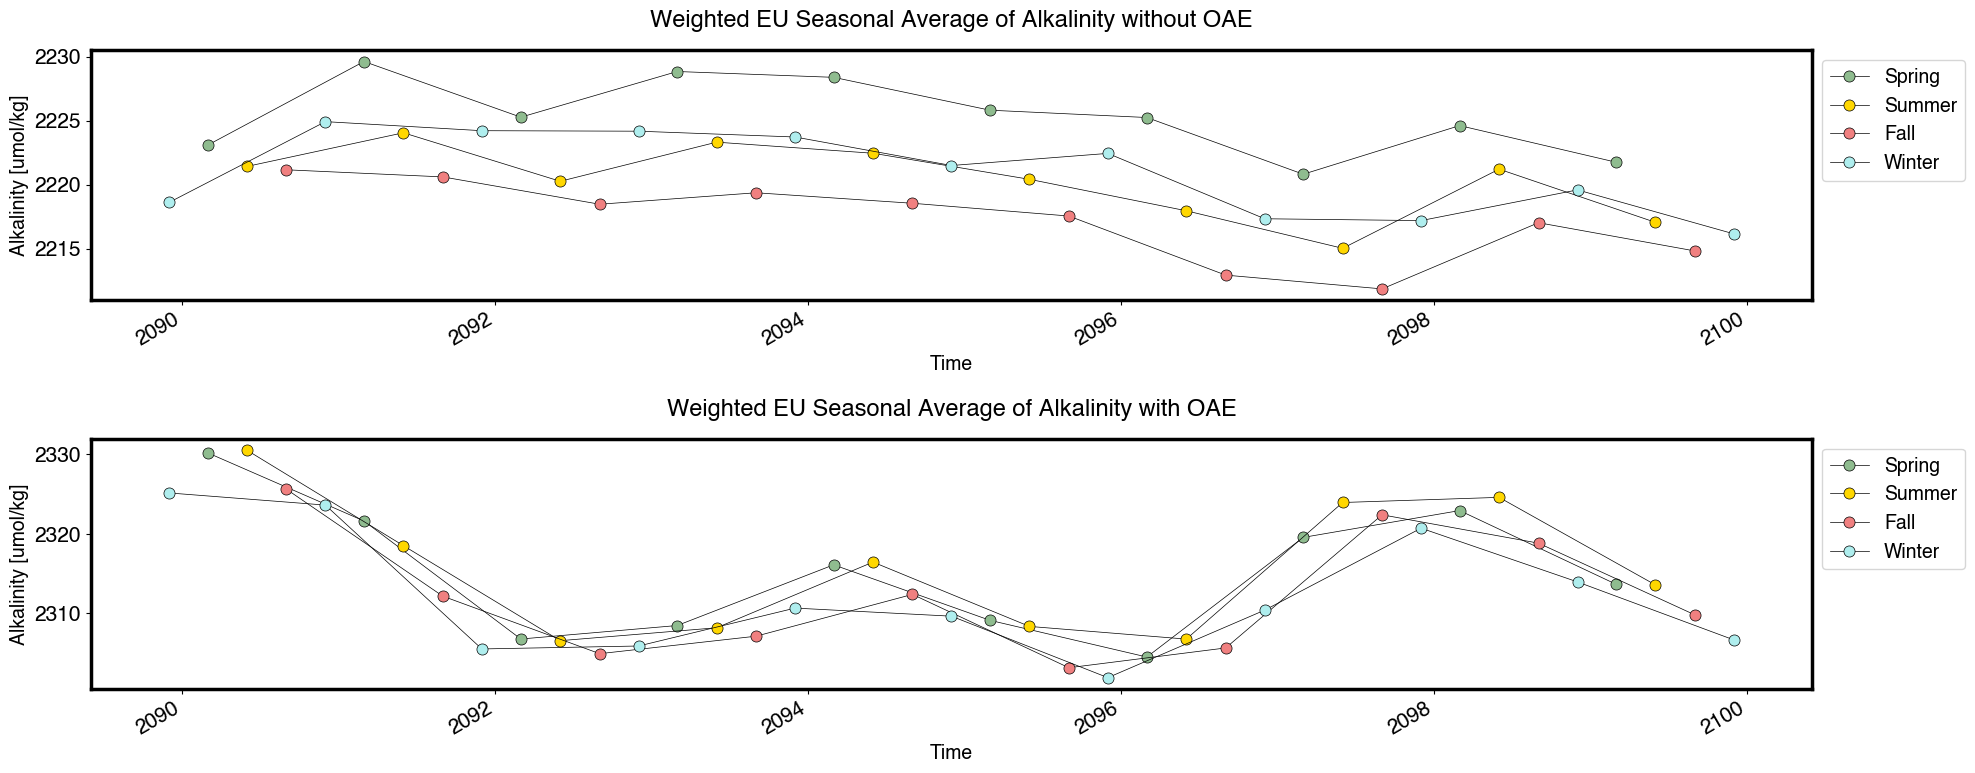

In [22]:
colors = {3: "darkseagreen", 6: "gold", 9: "lightcoral", 12: "paleturquoise"}
seasons = {3: "Spring", 6: "Summer", 9: "Fall", 12: "Winter"}

f, (ax1, ax2) = plt.subplots(2, 1, figsize=(20, 8), sharey=False)
for month, arr in alk_weighted_season_baseline.groupby('time_counter.month'):
    arr.plot(ax=ax1,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax1.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax1.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)
ax1.set_xlabel('Time', fontsize=14)
ax1.set_ylabel('Alkalinity [umol/kg]', fontsize=14)

for month, arr in alk_weighted_season_oae.groupby('time_counter.month'):
    arr.plot(ax=ax2,
             color="black", linewidth=0.5, 
             marker="o", markersize=8, markeredgewidth=0.5,
             markerfacecolor=colors[month],
             markeredgecolor='black',
             label=seasons[month])

ax2.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax2.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontsize=17, y=1.06)
ax2.set_xlabel('Time', fontsize=14)
ax2.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
f.tight_layout()
plt.show()

### Weighted EU Seasonal Average of Alkalinity without OAE (seasons displayed)

In [23]:
alk_weighted_baseline = alk_weighted_season_baseline.to_dataframe('alk')
alk_weighted_baseline['Month'] = pd.DatetimeIndex(alk_weighted_baseline.index).month

In [24]:
conditions = [
    (alk_weighted_baseline['Month'] == 3),
    (alk_weighted_baseline['Month'] == 6),
    (alk_weighted_baseline['Month'] == 9),
    (alk_weighted_baseline['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_baseline['Month'] = np.select(conditions, values)

In [25]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

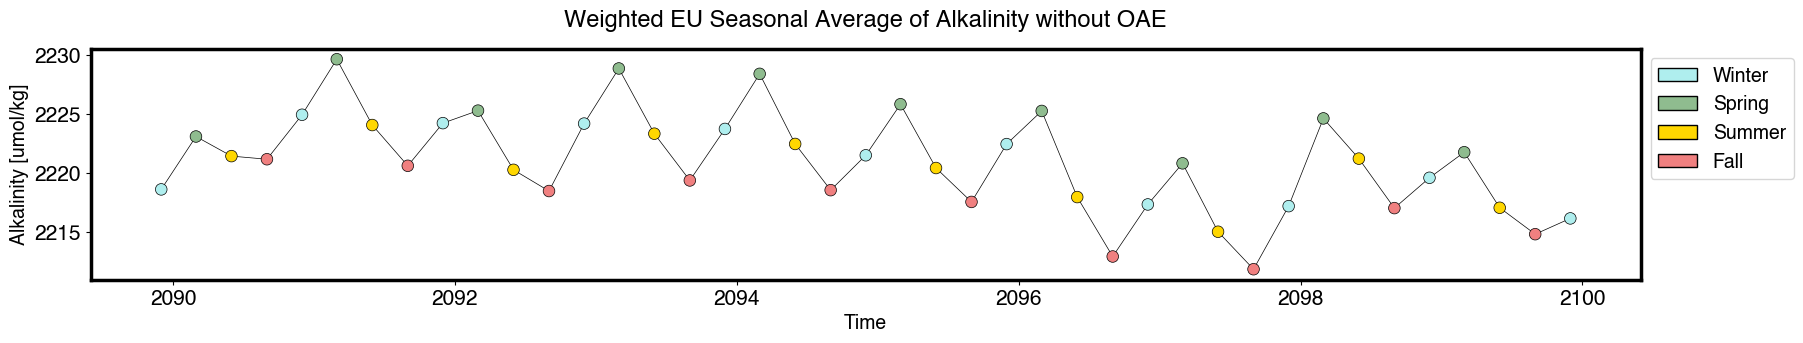

In [26]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.alk, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity without OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity with OAE (seasons displayed)

In [27]:
alk_weighted_oae = alk_weighted_season_oae.to_dataframe('alk')
alk_weighted_oae['Month'] = pd.DatetimeIndex(alk_weighted_oae.index).month

In [28]:
conditions = [
    (alk_weighted_oae['Month'] == 3),
    (alk_weighted_oae['Month'] == 6),
    (alk_weighted_oae['Month'] == 9),
    (alk_weighted_oae['Month'] == 12)
]

values = ['Spring', 'Summer', 'Fall', 'Winter']

alk_weighted_oae['Month'] = np.select(conditions, values)

In [29]:
colors = dict(zip(alk_weighted_oae.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

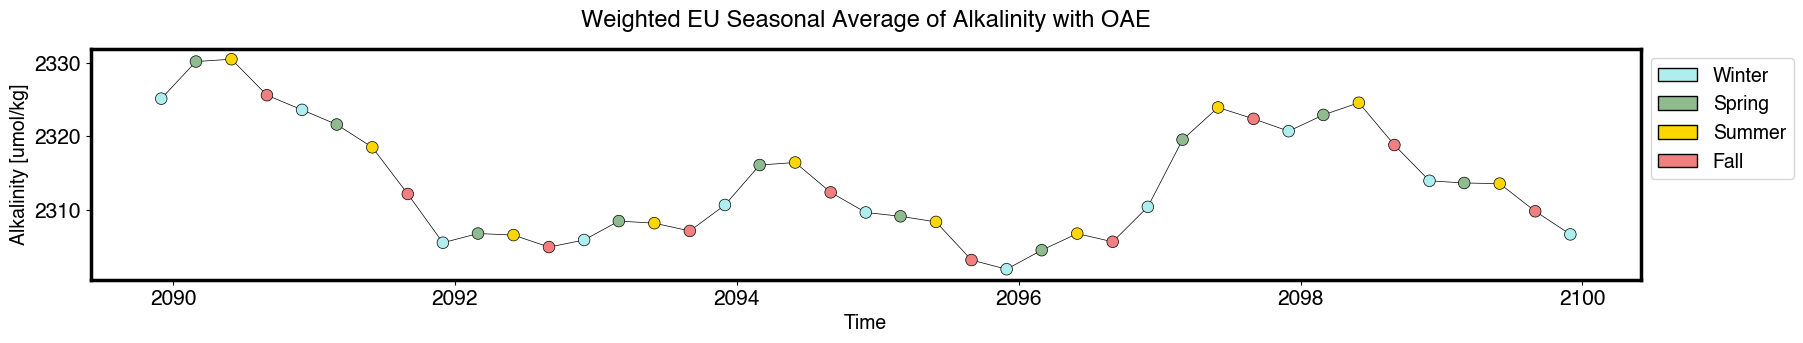

In [30]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.alk, color=alk_weighted_oae.Month.map(lambda x: colors[x]), edgecolors='black', linewidth=0.5, s=70)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity with OAE", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity (seasons displayed)

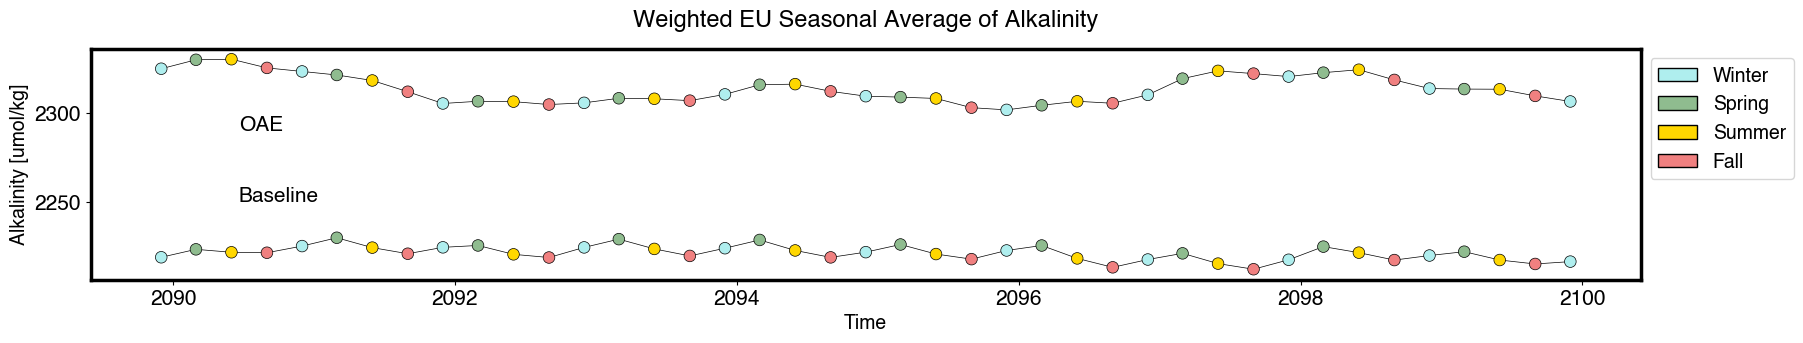

In [31]:
colors = dict(zip(alk_weighted_baseline.Month.unique(), ['paleturquoise', 'darkseagreen', 'gold', 'lightcoral']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_weighted_baseline.index, alk_weighted_baseline.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 2250, s='Baseline')
ax.scatter(alk_weighted_baseline.index, alk_weighted_baseline.alk, color=alk_weighted_baseline.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

ax.plot_date(alk_weighted_oae.index, alk_weighted_oae.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 2290, s='OAE')
ax.scatter(alk_weighted_oae.index, alk_weighted_oae.alk, color=alk_weighted_oae.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=70)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=14)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

#plt.savefig('EUAlk_seasonal_mean.png')

pass

### EU Monthly Averaged alk for the last 10 years

In [32]:
mean_baseline = (sliced_frame_baseline.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_baseline = mean_baseline.groupby(mean_baseline.index.month).ALK.mean()
mean_baseline = mean_baseline.reset_index()
mean_baseline['time_counter'] = mean_baseline['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_baseline = mean_baseline.set_index('time_counter')

In [33]:
mean_oae = (sliced_frame_oae.ALK.mean(dim=('y', 'x', 'deptht'))).to_dataframe()
mean_oae = mean_oae.groupby(mean_oae.index.month).ALK.mean()
mean_oae = mean_oae.reset_index()
mean_oae['time_counter']= mean_oae['time_counter'].apply(lambda x: calendar.month_abbr[x])
mean_oae = mean_oae.set_index('time_counter')

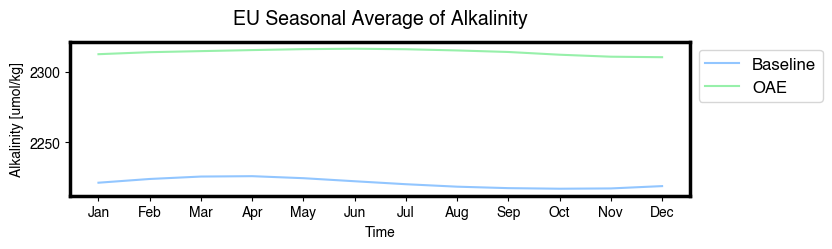

In [34]:
plt.figure(figsize=(8,2))
plt.plot(mean_baseline.ALK, label='Baseline')
plt.plot(mean_oae.ALK, label='OAE')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.xlabel("Time", fontsize=10)
plt.ylabel("Alkalinity [umol/kg]", fontsize=10)
plt.xticks(fontsize=10, fontname="Helvetica")
plt.yticks(fontsize=10, fontname="Helvetica")
plt.title('EU Seasonal Average of Alkalinity', fontname="Helvetica", fontsize=14, y=1.06)
plt.show()

### Map of EU Seasonal Average of Alkalinity without OAE

In [35]:
sliced_frame_baseline = sliced_frame_baseline.ALK.mean(dim=('deptht'))

In [36]:
month_length = sliced_frame_baseline.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_baseline = (sliced_frame_baseline * weights).groupby("time_counter.season").sum(dim="time_counter")

In [37]:
ds_unweighted_baseline = sliced_frame_baseline.groupby("time_counter.season").mean("time_counter")
ds_diff_baseline = ds_weighted_baseline - ds_unweighted_baseline

In [38]:
ds_weighted_baseline = ds_weighted_baseline.to_dataset(name='alk')
ds_unweighted_baseline = ds_unweighted_baseline.to_dataset(name='alk')
ds_diff_baseline = ds_diff_baseline.to_dataset(name='alk')

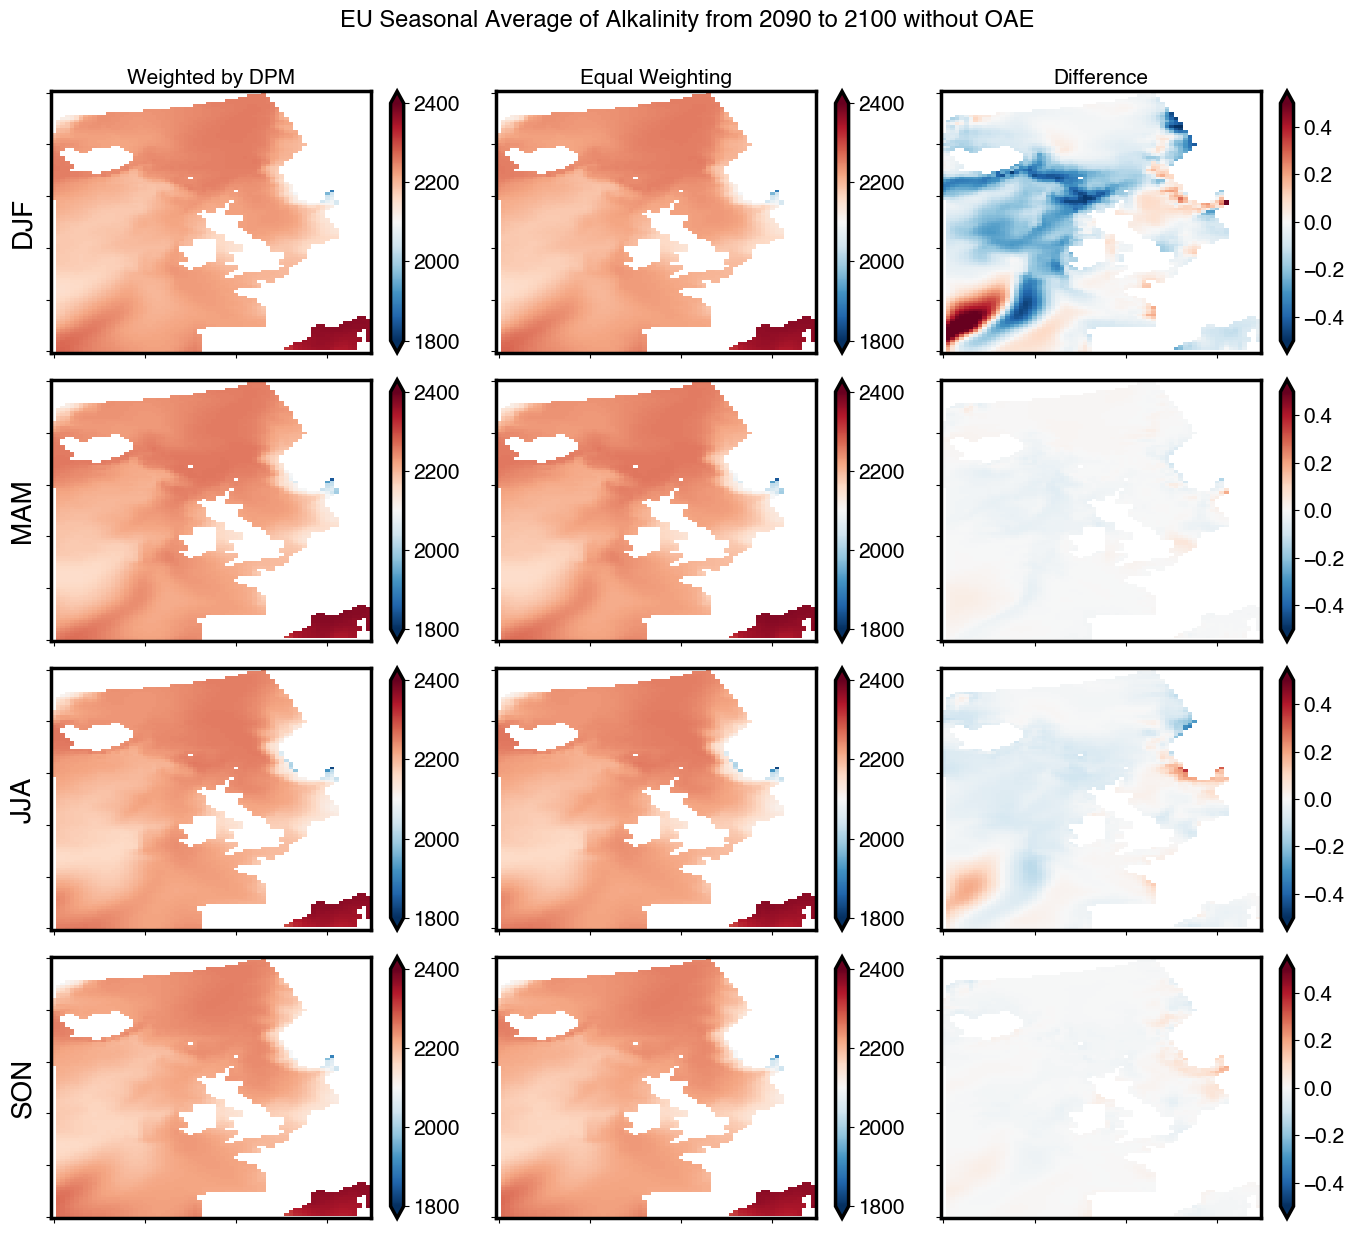

In [82]:
notnull = pd.notnull(ds_unweighted_baseline["alk"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_baseline["alk"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=1800,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_baseline["alk"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=1800,
        vmax=2400,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_baseline["alk"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 without OAE", fontsize=17, y=1.03)

pass

### Map of EU Seasonal Average of Alkalinity with OAE

In [40]:
sliced_frame_oae = sliced_frame_oae.ALK.mean(dim=('deptht'))

In [41]:
month_length = sliced_frame_oae.time_counter.dt.days_in_month 
weights = (month_length.groupby("time_counter.season") / month_length.groupby("time_counter.season").sum())
np.testing.assert_allclose(weights.groupby('time_counter.season').sum().values, np.ones(4))
ds_weighted_oae = (sliced_frame_oae * weights).groupby("time_counter.season").sum(dim="time_counter")

In [42]:
ds_unweighted_oae = sliced_frame_oae.groupby("time_counter.season").mean("time_counter")
ds_diff_oae = ds_weighted_oae - ds_unweighted_oae

In [43]:
ds_weighted_oae = ds_weighted_oae.to_dataset(name='alk')
ds_unweighted_oae = ds_unweighted_oae.to_dataset(name='alk')
ds_diff_oae = ds_diff_oae.to_dataset(name='alk')

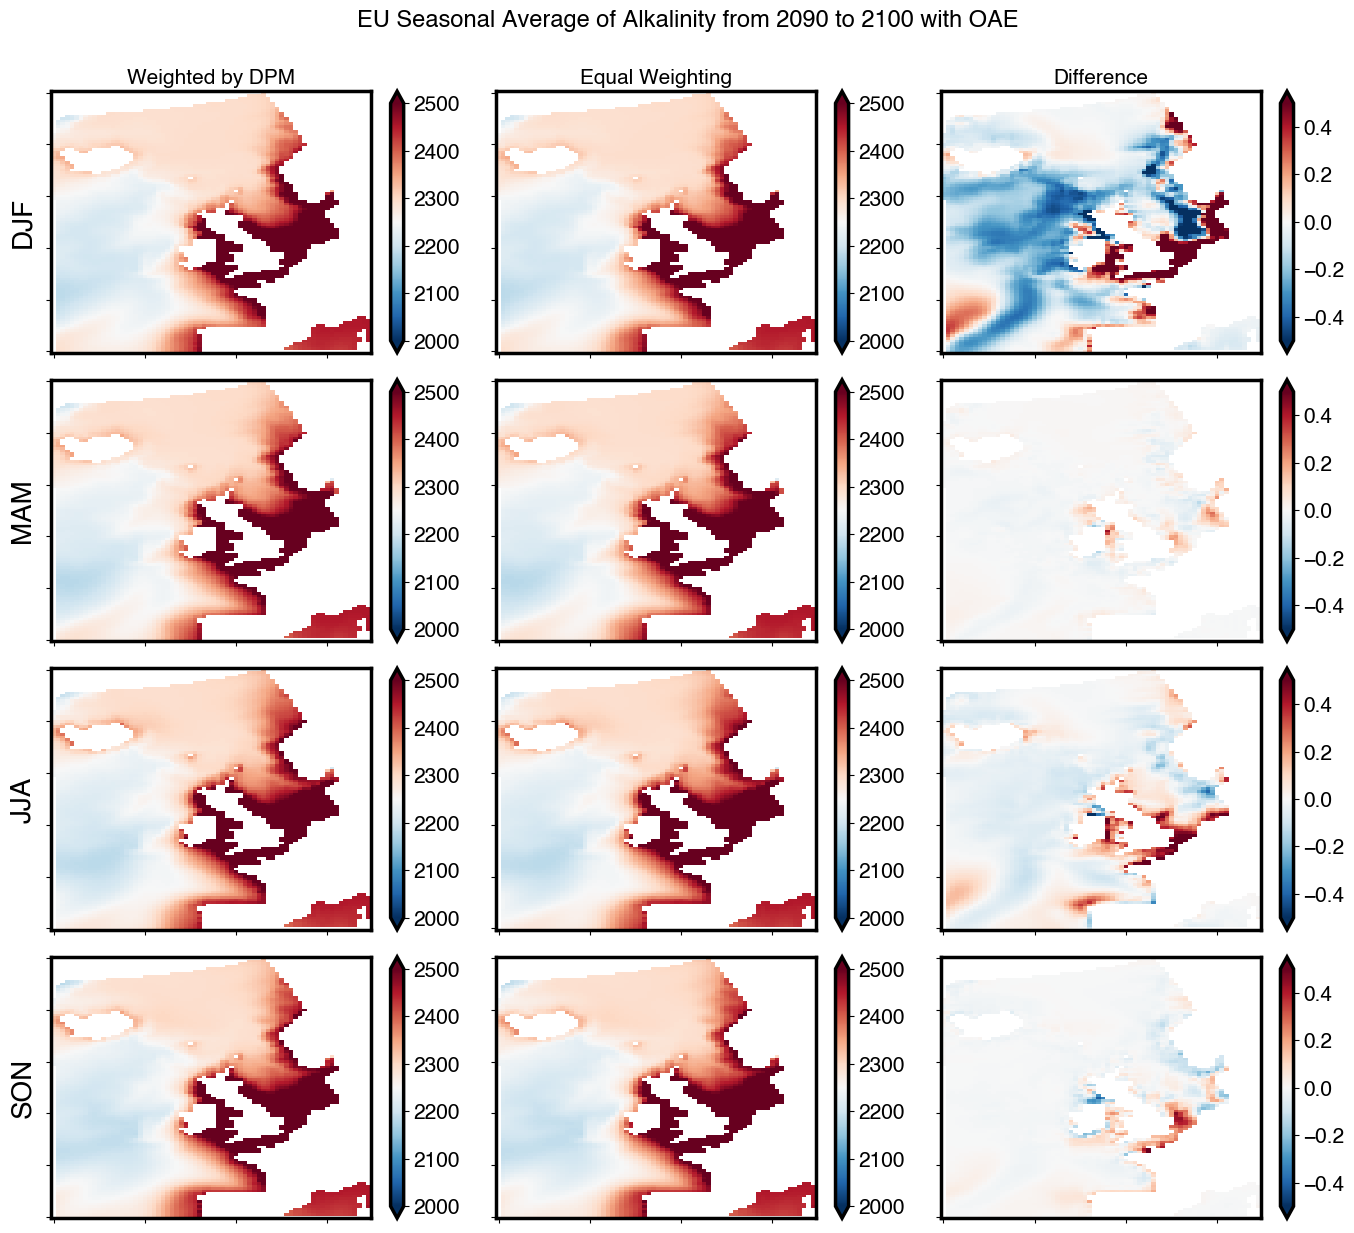

In [44]:
notnull = pd.notnull(ds_unweighted_baseline["alk"][0])

fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(14, 12))
for i, season in enumerate(("DJF", "MAM", "JJA", "SON")):
    ds_weighted_oae["alk"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 0],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_unweighted_oae["alk"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 1],
        vmin=2000,
        vmax=2500,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    ds_diff_oae["alk"].sel(season=season).where(notnull).plot.pcolormesh(
        ax=axes[i, 2],
        vmin=-0.5,
        vmax=0.5,
        cmap="RdBu_r",
        add_colorbar=True, add_labels=False,
        extend="both",
    )

    axes[i, 0].set_ylabel(season)
    axes[i, 1].set_ylabel("")
    axes[i, 2].set_ylabel("")

for ax in axes.flat:
    ax.axes.get_xaxis().set_ticklabels([])
    ax.axes.get_yaxis().set_ticklabels([])
    ax.axes.axis("tight")
    ax.set_xlabel("")

axes[0, 0].set_title("Weighted by DPM", fontsize=15)
axes[0, 1].set_title("Equal Weighting", fontsize=15)
axes[0, 2].set_title("Difference", fontsize=15)

plt.tight_layout()

fig.suptitle("EU Seasonal Average of Alkalinity from 2090 to 2100 with OAE", fontsize=17, y=1.03)

pass

### EU Monthly Average of Alkalinity

In [45]:
start_date_month = "2090-01-01"
end_date_month = "2100-01-01"

alk_baseline_month = data_baseline["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_baseline = alk_baseline_month.groupby('time_counter').mean(["y", "x", "deptht"])

In [46]:
alk_oae_month = data_oae["ALK"].sel(time_counter=slice(start_date_month, end_date_month))
alk_monthly_mean_oae = alk_oae_month.groupby('time_counter').mean(["y", "x", "deptht"])

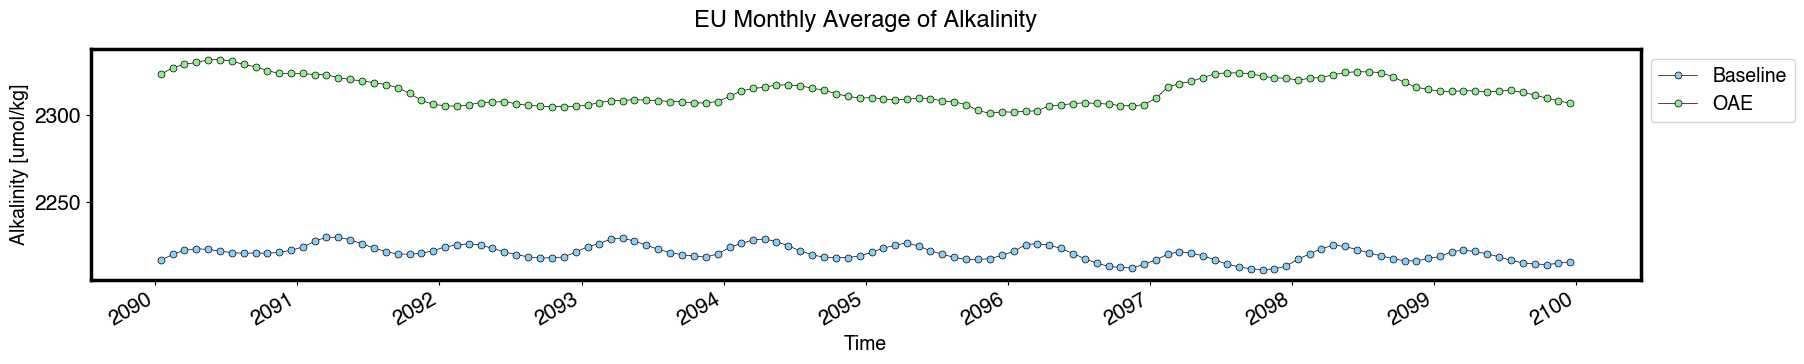

In [47]:
f, ax = plt.subplots(figsize=(20, 3))

alk_monthly_mean_baseline.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightskyblue", 
                        markeredgecolor="black", 
                        label = 'Baseline')

alk_monthly_mean_oae.plot(marker="o", markersize=5, markeredgewidth=0.5,
                        color="black", linewidth=0.5,
                        markerfacecolor="lightgreen",
                        markeredgecolor="black", 
                        label = 'OAE')
ax.set_title("EU Monthly Average of Alkalinity", fontname="Helvetica", fontsize=17, y=1.06)

plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity [umol/kg]", fontsize=14)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=14)
plt.show()

### EU Monthly Average of Alkalinity without OAE (months displayed)

In [48]:
alk_baseline_monthly = alk_monthly_mean_baseline.to_dataframe('alk')
alk_baseline_monthly['Month'] = pd.DatetimeIndex(alk_baseline_monthly.index).month

In [49]:
conditions = [
    (alk_baseline_monthly['Month'] == 1),
    (alk_baseline_monthly['Month'] == 2),
    (alk_baseline_monthly['Month'] == 3),
    (alk_baseline_monthly['Month'] == 4),
    (alk_baseline_monthly['Month'] == 5),
    (alk_baseline_monthly['Month'] == 6),
    (alk_baseline_monthly['Month'] == 7),
    (alk_baseline_monthly['Month'] == 8),
    (alk_baseline_monthly['Month'] == 9),
    (alk_baseline_monthly['Month'] == 10),
    (alk_baseline_monthly['Month'] == 11),
    (alk_baseline_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_baseline_monthly['Month'] = np.select(conditions, values)

In [50]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

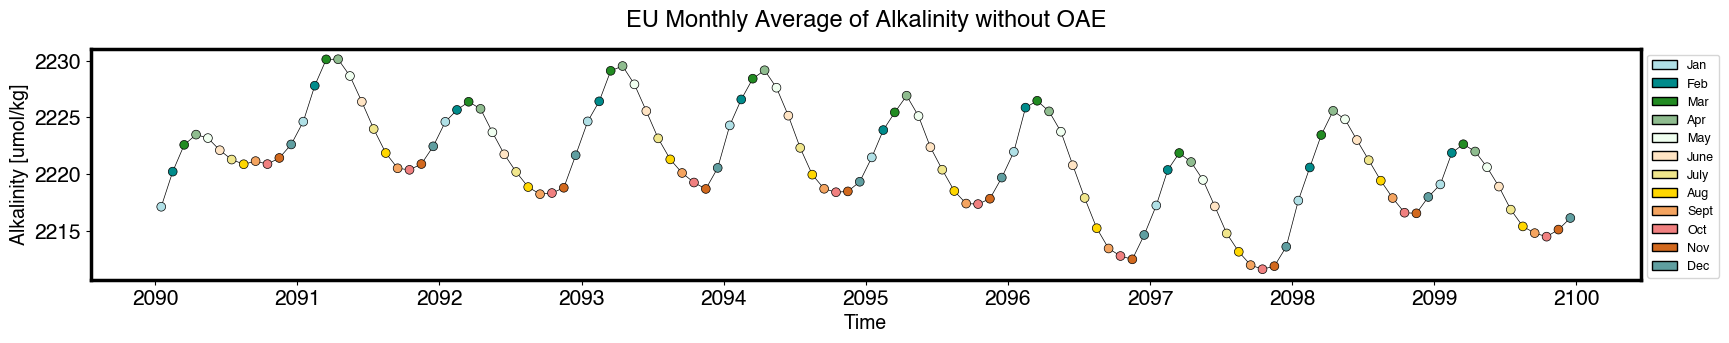

In [51]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.alk, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity without OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### EU Monthly Average of Alkalinity with OAE (months displayed)

In [52]:
alk_oae_monthly = alk_monthly_mean_oae.to_dataframe('alk')
alk_oae_monthly['Month'] = pd.DatetimeIndex(alk_oae_monthly.index).month

In [53]:
conditions = [
    (alk_oae_monthly['Month'] == 1),
    (alk_oae_monthly['Month'] == 2),
    (alk_oae_monthly['Month'] == 3),
    (alk_oae_monthly['Month'] == 4),
    (alk_oae_monthly['Month'] == 5),
    (alk_oae_monthly['Month'] == 6),
    (alk_oae_monthly['Month'] == 7),
    (alk_oae_monthly['Month'] == 8),
    (alk_oae_monthly['Month'] == 9),
    (alk_oae_monthly['Month'] == 10),
    (alk_oae_monthly['Month'] == 11),
    (alk_oae_monthly['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

alk_oae_monthly['Month'] = np.select(conditions, values)

In [54]:
colors = dict(zip(alk_oae_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

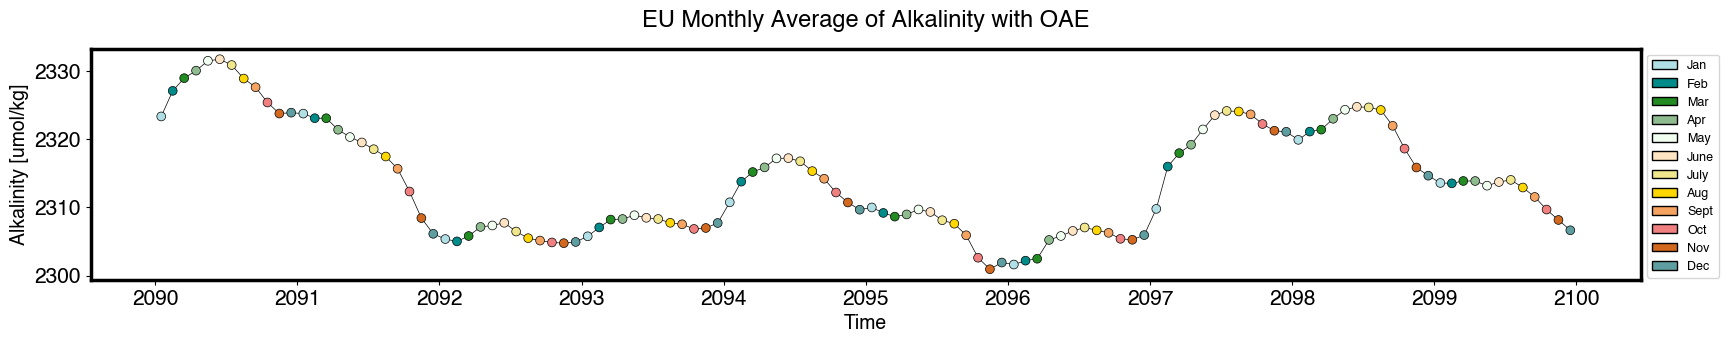

In [55]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.alk, color=alk_oae_monthly.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("EU Monthly Average of Alkalinity with OAE", fontname="Helvetica", fontsize=17, y=1.06)

pass

### Weighted EU Seasonal Average of Alkalinity (months displayed)

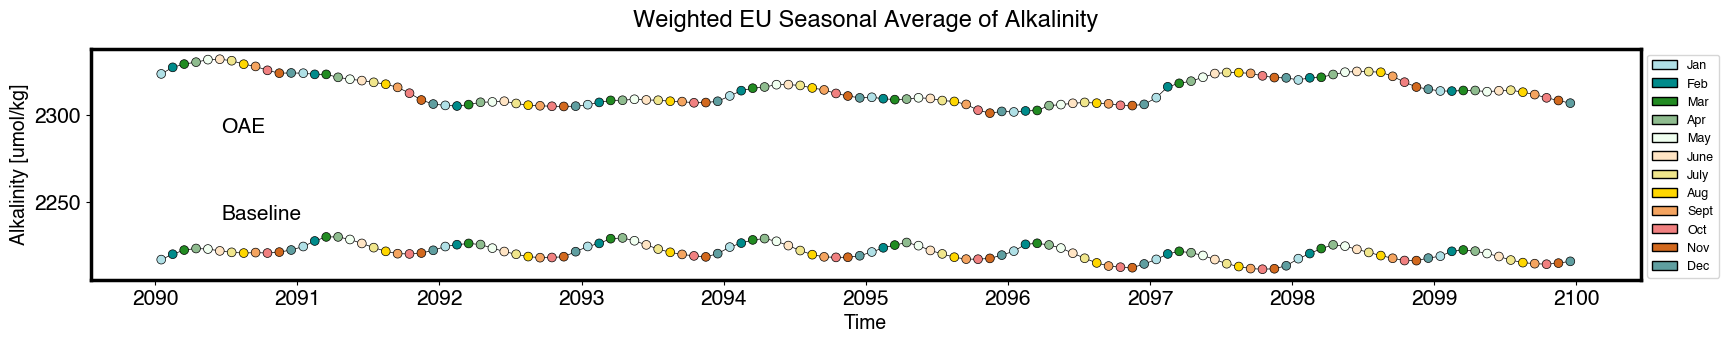

In [56]:
colors = dict(zip(alk_baseline_monthly.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

fig, ax = plt.subplots(figsize=(20, 3))

ax.plot_date(alk_baseline_monthly.index, alk_baseline_monthly.alk, '-', label='Baseline', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 2240, s='Baseline')
ax.scatter(alk_baseline_monthly.index, alk_baseline_monthly.alk, color=alk_baseline_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

ax.plot_date(alk_oae_monthly.index, alk_oae_monthly.alk, '-', label='OAE', color="black", linewidth=0.5, zorder=1)
ax.text(44000, 2290, s='OAE')
ax.scatter(alk_oae_monthly.index, alk_oae_monthly.alk, color=alk_oae_monthly.Month.map(lambda x: colors[x]), marker='o', edgecolors='black', linewidth=0.5, s=40)

legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='best', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Alkalinity [umol/kg]', fontsize=14)
ax.set_title("Weighted EU Seasonal Average of Alkalinity", fontsize=17, y=1.06)

#plt.savefig('EUAlk_monthly_mean.png')

pass

### Δ Alkalinity between Baseline and OAE

In [57]:
delta_alk = alk_oae_monthly.alk - alk_baseline_monthly.alk

In [58]:
delta_alk = delta_alk.to_xarray()

In [59]:
delta_alk = delta_alk.to_dataframe('alk')
delta_alk['Month'] = pd.DatetimeIndex(delta_alk.index).month

In [60]:
conditions = [
    (delta_alk['Month'] == 1),
    (delta_alk['Month'] == 2),
    (delta_alk['Month'] == 3),
    (delta_alk['Month'] == 4),
    (delta_alk['Month'] == 5),
    (delta_alk['Month'] == 6),
    (delta_alk['Month'] == 7),
    (delta_alk['Month'] == 8),
    (delta_alk['Month'] == 9),
    (delta_alk['Month'] == 10),
    (delta_alk['Month'] == 11),
    (delta_alk['Month'] == 12)
]

values = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'June', 'July', 'Aug', 'Sept', 'Oct', 'Nov', 'Dec']

delta_alk['Month'] = np.select(conditions, values)

In [61]:
colors = dict(zip(delta_alk.Month.unique(), ['powderblue', 'darkcyan', 'forestgreen', 'darkseagreen', 
                                                        'honeydew', 'bisque', 'khaki', 'gold', 
                                                        'sandybrown', 'lightcoral', 'chocolate', 'cadetblue']))

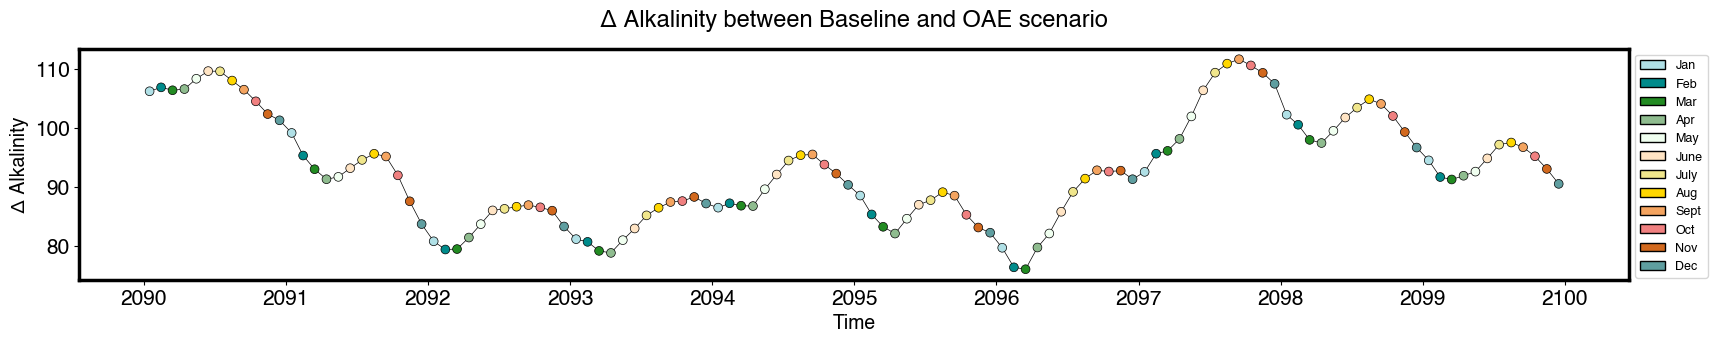

In [62]:
fig, ax = plt.subplots(figsize=(20, 3))
ax.plot_date(delta_alk.index, delta_alk.alk, '-', color="black", linewidth=0.5, zorder=1)
ax.scatter(delta_alk.index, delta_alk.alk, color=delta_alk.Month.map(lambda x: colors[x]), edgecolors='black',  linewidth=0.5, s=40)
legend = [mpatches.Patch(facecolor = value, edgecolor = "black", label = key, alpha = 1) for key, value in colors.items()]
ax.legend(handles = legend, bbox_to_anchor=(1, 1), loc='upper left', fontsize=9)
ax.set_xlabel('Time', fontsize=14)
ax.set_ylabel('Δ Alkalinity', fontsize=14)
ax.set_title("Δ Alkalinity between Baseline and OAE scenario", fontname="Helvetica", fontsize=17, y=1.06)

#plt.savefig('ΔAlk_seasonal_mean.png')

pass

### Alkalinity Annual Amplitude without OAE

In [63]:
data_baseline_minmax = data_baseline_plot.to_dataframe()
data_baseline_minmax = data_baseline_minmax.reset_index()

In [64]:
year_max_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmax().values]

In [65]:
year_min_baseline = data_baseline_minmax.loc[data_baseline_minmax.groupby(data_baseline_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmin().values]

In [66]:
year_max_baseline['year'] = year_max_baseline['time_counter'].dt.year
year_min_baseline['year'] = year_min_baseline['time_counter'].dt.year

In [67]:
year_max_baseline = year_max_baseline.set_index('year')
year_min_baseline = year_min_baseline.set_index('year')

In [68]:
alk_amplitude_baseline = year_max_baseline['ALK'] - year_min_baseline['ALK']

In [69]:
alk_amplitude_baseline = alk_amplitude_baseline.to_xarray()

In [70]:
alk_amplitude_baseline = alk_amplitude_baseline.to_dataset()

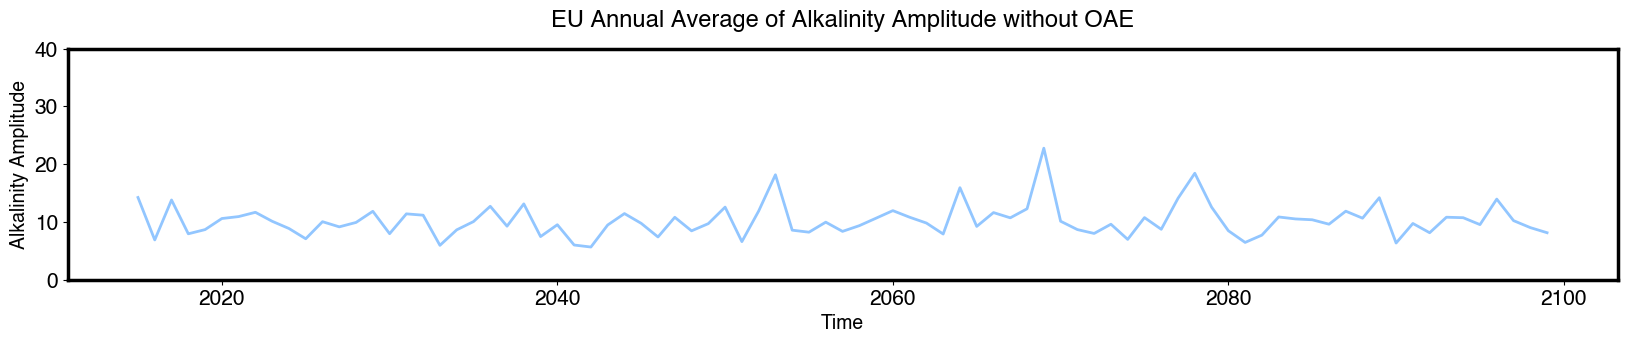

In [71]:
plt.figure(figsize=(20, 3))
plt.plot(alk_amplitude_baseline.year, alk_amplitude_baseline.ALK, linewidth=2)
plt.ylim(0, 40)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity Amplitude", fontsize=14)
plt.title('EU Annual Average of Alkalinity Amplitude without OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Alkalinity Annual Amplitude with OAE

In [72]:
data_oae_minmax = data_oae_plot.to_dataframe()
data_oae_minmax = data_oae_minmax.reset_index()

In [73]:
year_max_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmax().values]

In [74]:
year_min_oae = data_oae_minmax.loc[data_oae_minmax.groupby(data_oae_minmax['time_counter'].dt.strftime('%Y'))['ALK'].idxmin().values]

In [75]:
year_max_oae['year'] = year_max_oae['time_counter'].dt.year
year_min_oae['year'] = year_min_oae['time_counter'].dt.year

In [76]:
year_max_oae = year_max_oae.set_index('year')
year_min_oae = year_min_oae.set_index('year')

In [77]:
alk_amplitude_oae = year_max_oae['ALK'] - year_min_oae['ALK']

In [78]:
alk_amplitude_oae = alk_amplitude_oae.to_xarray()

In [79]:
alk_amplitude_oae = alk_amplitude_oae.to_dataset()

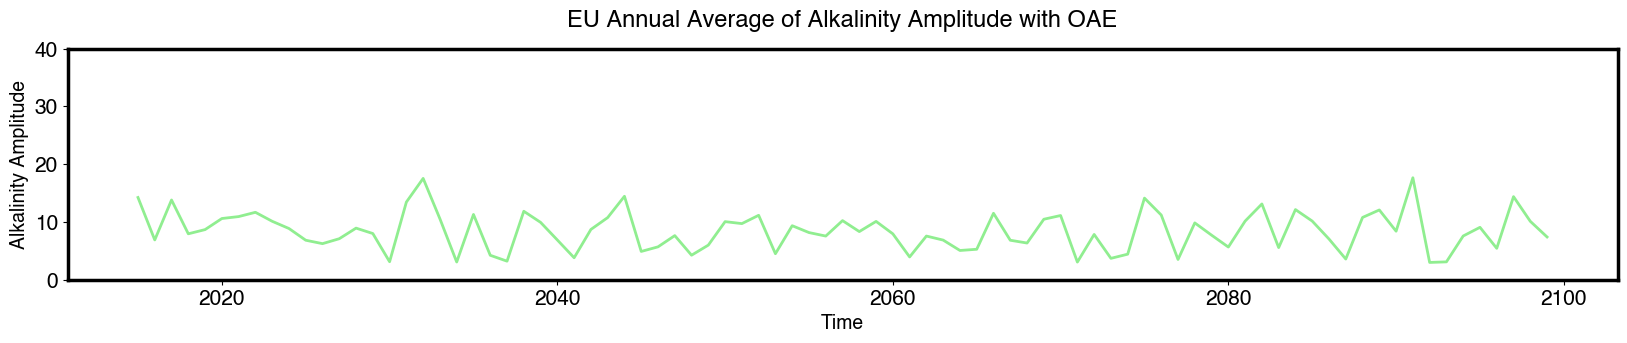

In [80]:
plt.figure(figsize=(20, 3))
plt.plot(alk_amplitude_oae.year, alk_amplitude_oae.ALK, linewidth=2, color='lightgreen')
plt.ylim(0, 40)
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity Amplitude", fontsize=14)
plt.title('EU Annual Average of Alkalinity Amplitude with OAE', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()

### Alkalinity Annual Amplitude with and without OAE

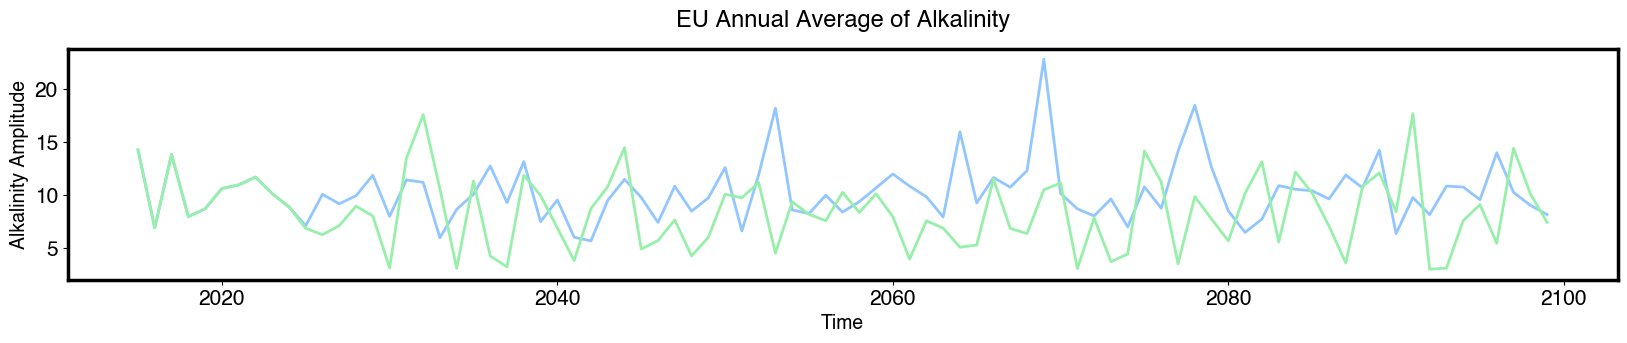

In [83]:
plt.figure(figsize=(20, 3))
plt.plot(alk_amplitude_baseline.year, alk_amplitude_baseline.ALK, linewidth=2, label = 'Baseline')
plt.plot(alk_amplitude_oae.year, alk_amplitude_oae.ALK, linewidth=2, label = 'OAE')
plt.xlabel("Time", fontsize=14)
plt.ylabel("Alkalinity Amplitude", fontsize=14)
plt.title('EU Annual Average of Alkalinity', fontname="Helvetica", fontsize=17, y=1.06)
plt.show()